# Exercise 2, Mini Image Classifier, 28P(oints)

## Lab Instructions
All your answers of this exercise should be written **in this notebook**.
You shouldn't need to write or modify any other files.

**You should execute every block of code to not miss any dependency. For the
training tasks, your notebook should contain the classification accuracy (the
 figures are NOT necessary however).
 Please DO NOT clear the notebook output when you submit it.
 Please DO NOT upload the dataset when you submit your homework.**

This exercise was developed by Ge Li for the KIT Cognitive Systems Lecture,
July 2021.

## Task instructions:
In this jupyter notebook, you are going to define multiple **Image
classifiers** with different structures. Read the instruction and example code
carefully and finish the tasks. You can run the training procedure and
thereby verify your computation and implementation.<br>

Detailed instructions:

0. You need to install torch and torchvision to run this notebook. E.g. if you
 use pip as the package manager, run "pip3 install torch torchvision".
  You need to install tqdm for visualize process-bar and matplotlib to visualize
 figure, run "pip3 install tqdm matplotlib".  
 You do not need a GPU to train.<br><br>

1. The dataset you are working with is CIFAR-10 dataset. The code in the file
**data_loader.py** will download and manage this dataset for you. You do not
 need to write any code for it.<br><br>

2. The deep learning platform you are working with is PyTorch. In the scope of
this homework, you can learn the fundamental knowledge from the instructions.
 You don't have to spend much time on external materials / tutorials.<br><br>

3. In this notebook, you will focus on the Neural Network models for image
classification. A classifier with fully connected layers is given as an
example. This example mainly contains two parts: a **constructor** in which
all the layers to be used are initialized (except activation function), and a
**forward** function, where
forward pass process of the network is defined. In PyTorch, once the forward
function of a network is
given, the gradient of the loss function with respect to the network
parameters can be automatically computed and back-propagated.<br><br>

4. In your model's constructor, you may need to call these functions:
    - Define fully connected layers: **nn.Linear(in_features, out_features)**,
such as: nn.Linear(64, 10)
    - Define 2-D convolutional layers: **nn.Conv2d(in_channels, out_channels,
kernel_size)**, such as: nn.Conv2d(8, 16, 5)
    - Define max-pooling layers: **nn.MaxPool2d(kernel_size, stride)**, such as:
nn.MaxPool2d(2, 2)<br><br>

5. In your model's forward function, you may need to call these functions:
    - Flatten the 3rd order tensor to 1st order tensor: e.g. **x = torch
    .flatten(x, 1)**
    - Relu activation function: e.g. **x = F.relu(x)**<br><br>

6. All the training and plotting related code are offered in the
file **fit.py**. The contents can
be described in the pseudo code below, which is also a common workflow
in deep learning. <br>
    - Get train, valid and test data-loader to load data from dataset.
    - Initialize the loss function and optimizer for parameters' updating.
    - Loop in epochs:
        - Loop in batch of training dataset:
            - Compute the output using forward function
            - Compute the loss using output and labels
            - Applying back-propagation and update network parameters
            - Record the training loss
        - Loop in batch of validation dataset:
            - Compute the output using forward function
            - Compute the loss using output and labels
            - Record the validation loss
        - Plotting the training and validation loss for each epoch.
        - save model's parameters if the model achieves a better performance
        - break the loop (early stopping) if the validation loss keeps
        increasing.
    - Apply the model with the best parameters to the test dataset and get the
    result (classification accuracy).
<br><br>

In [1]:
# DO NOT MODIFY THIS BLOCK
# DO NOT MODIFY THIS BLOCK
# DO NOT MODIFY THIS BLOCK

# Import Python libs
import torch
import torch.nn as nn
import torch.nn.functional as F
from ex2.fit import fit

# Fix random seed to make sure the result in your computer is reproducible
torch.manual_seed(0)

# Max training epochs
max_epochs = 100


Files already downloaded and verified
Files already downloaded and verified


### Task a)
- Read the implementation of fully connected layers classifier, then run the
cell afterwards to train this classifier. The training result will be shown
automatically.

In [2]:
# DO NOT MODIFY THIS BLOCK
# DO NOT MODIFY THIS BLOCK
# DO NOT MODIFY THIS BLOCK

class FCLayersNet(nn.Module):
    """
    Image classifier using fully connected layers
    """

    def __init__(self):
        """
        Model Constructor, Initialize all the layers to be used
        """
        super(FCLayersNet, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        """
        This function defines the forward pass of this net model.
        Once this function is defined, the gradient back-propagation can be
        automatically computed by PyTorch.

        :param x: input data of this model
        :return: output data of this model
        """
        # The original data is 3rd order tensor, we need to flatten it to 1st
        # order tensor, as the input of the fully connected layer.
        x = torch.flatten(x, 1)

        # The data pass through the fully connected layers one after another
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)

        x = self.fc4(x)

        return x

- Run next cell and see the training progress and results.

FCLayersNet Training:  10%|█         | 10/100 [01:41<15:09, 10.11s/Epoch, train_loss=0.701, valid_loss=1.54]


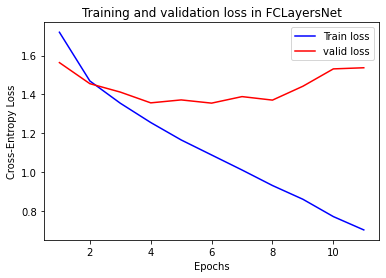

Finished Training.
Accuracy of the network on the 10000 test images: 53.30 %


In [3]:
# Run me
%matplotlib inline
fit(FCLayersNet(), max_epochs, early_stop=True)

### Task b)

- Write down the missing cells:<br>

    - I: 28*28*8, II: 28*28*8, III: 24*24*16, IV: 24*24*16, V: 20*20*16, VI: 20*20*16

- Finish the implementation:

In [4]:
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK

class ConvLayersNet(nn.Module):
    """
    Image classifier using convolutional layers
    """

    def __init__(self):
        """
        Model Constructor, Initialize all the layers to be used
        """
        super(ConvLayersNet, self).__init__()
        ########   Your code begins here   ########
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.conv3 = nn.Conv2d(16, 16, 5)
        self.fc1 = nn.Linear(16 * 20 * 20, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)
        ########   Your code ends here   ########

    def forward(self, x):
        """
        This function defines the forward pass of this net model.
        Once this function is defined, the gradient back-propagation can be
        automatically computed by PyTorch.

        :param x: input data of this model
        :return: output data of this model
        """
        ########   Your code begins here   ########
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = self.conv3(x)
        x = F.relu(x)

        # The original data is 3rd order tensor, we need to flatten it to 1st
        # order tensor, as the input of the fully connected layer.
        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)

        x = self.fc4(x)
        ########   Your code ends here   ########
        return x

- Run next cell and see the training progress and results.

ConvLayersNet Training:  14%|█▍        | 14/100 [04:36<28:16, 19.72s/Epoch, train_loss=0.196, valid_loss=1.89]


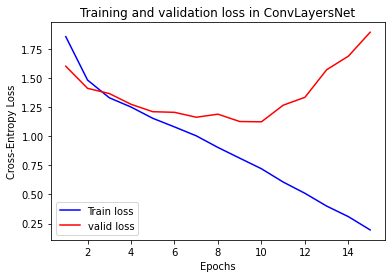

Finished Training.
Accuracy of the network on the 10000 test images: 60.55 %


In [5]:
# Run me
%matplotlib inline
fit(ConvLayersNet(), max_epochs, early_stop=True)

### Task c)

- Recall the knowledge in Cognitive system lecture, what kind of benefits can
we expect when applying max-pooling layer in CNNs?<br>

- Write down the missing cells:<br>

    - I: 28*28*8, II: 28*28*8, III: 14*14*8, IV: 14*14*8, V: 10*10*16, VI: 10*10*16, VII: 5*5*16, VIII: 5*5*16

- Finish the implementation: <br>

In [6]:
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK

class CNNs(nn.Module):
    """
    Image classifier using convolutional layers with max pooling.
    """

    def __init__(self):
        """
        Model Constructor, Initialize all the layers to be used
        """
        super(CNNs, self).__init__()
        ########   Your code begins here   ########
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        ########   Your code ends here   ########

    def forward(self, x):
        """
        This function defines the forward pass of this net model.
        Once this function is defined, the gradient back-propagation can be
        automatically computed by PyTorch.

        :param x: input data of this model
        :return: output data of this model
        """
        ########   Your code begins here   ########
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        ########   Your code ends here   ########
        return x


- Run next cell and see the training progress and results.

CNNs Training:   0%|          | 0/100 [00:00<?, ?Epoch/s]/home/lige/Softwares/anaconda3/envs/cogsys21/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
CNNs Training:  31%|███       | 31/100 [04:22<09:43,  8.45s/Epoch, train_loss=0.86, valid_loss=1.07] 


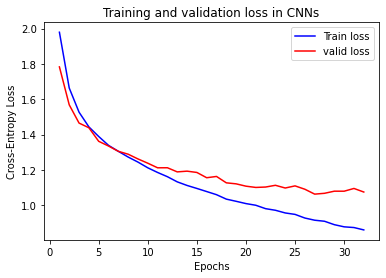

Finished Training.
Accuracy of the network on the 10000 test images: 62.90 %


In [7]:
# Run me
%matplotlib inline
fit(CNNs(), max_epochs, early_stop=True)

### Task d)

- Write down the missing cells:<br>

    - I: 28*28*16, II: 28*28*16, III: 14*14*16, IV: 14*14*16, V: 10*10*32, VI:10*10*32, VII: 5*5*32, VIII: 5*5*32

- Finish the implementation:

In [8]:
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK

class CNNsMoreChannels(nn.Module):
    """
    Image classifier using CNNs with more channels.
    """

    def __init__(self):
        """
        Model Constructor, Initialize all the layers to be used
        """
        super(CNNsMoreChannels, self).__init__()
        ########   Your code begins here   ########
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        ########   Your code ends here   ########

    def forward(self, x):
        """
        This function defines the forward pass of this net model.
        Once this function is defined, the gradient back-propagation can be
        automatically computed by PyTorch.

        :param x: input data of this model
        :return: output data of this model
        """
        ########   Your code begins here   ########
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        ########   Your code ends here   ########
        return x

- Run next cell and see the training progress and results.

CNNsMoreChannels Training:  24%|██▍       | 24/100 [05:02<15:59, 12.62s/Epoch, train_loss=0.568, valid_loss=1.02] 


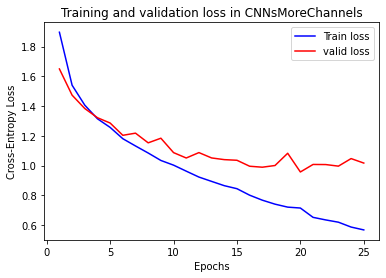

Finished Training.
Accuracy of the network on the 10000 test images: 66.89 %


In [9]:
# Run me
%matplotlib inline
fit(CNNsMoreChannels(), max_epochs, early_stop=True)

### Task e)

- Write down the missing cells:<br>

    - I: 30*30*8, II: 30*30*8, III: 15*15*8, IV: 15*15*8, V: 13*13*16, VI: 13*13*16, VII: 6*6*16, VIII: 6*6*16

- Finish the implementation:

In [10]:
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK
# TODO: PLEASE FINISH THE IMPLEMENTATION IN THIS BLOCK

class CNNsSmallKernel(nn.Module):
    """
    Image classifier using CNNs with small kernel size.
    """

    def __init__(self):
        """
        Model Constructor, Initialize all the layers to be used
        """
        super(CNNsSmallKernel, self).__init__()
        ########   Your code begins here   ########
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        ########   Your code ends here   ########

    def forward(self, x):
        """
        This function defines the forward pass of this net model.
        Once this function is defined, the gradient back-propagation can be
        automatically computed by PyTorch.

        :param x: input data of this model
        :return: output data of this model
        """
        ########   Your code begins here   ########
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        ########   Your code ends here   ########
        return x


- Run next cell and see the training progress and results.

CNNsSmallKernel Training:  34%|███▍      | 34/100 [07:31<14:35, 13.27s/Epoch, train_loss=0.817, valid_loss=1.12]


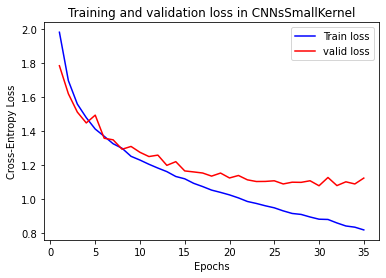

Finished Training.
Accuracy of the network on the 10000 test images: 61.54 %


In [11]:
# Run me
%matplotlib inline
fit(CNNsSmallKernel(), max_epochs, early_stop=True)

### Task f)

- Why do we apply early stopping during the training? <br>

Your answer:<br>

- Please write down an alternative way to achieve a similar effect as early
stopping. <br>

Your answer:<br>

